In [46]:
from gensim.models import word2vec


In [6]:
import MeCab
import pickle

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [10]:
import collections

In [11]:
class Review:
    def __init__ (self,star,text):
        self.star = star
        self.text = text

In [13]:
with open('../data/processing/reviews-2.pickle','rb') as f:
    revs = pickle.load(f)

In [21]:
revs_copy = [[],[],[],[],[],[]]
for r in revs:
    revs_copy[r.star].append(r)


In [27]:
len(revs_copy[2])

866

In [30]:
import random

In [31]:
revs_copy_resample = []
for i in range(1,6):
    revs_copy_resample.extend(random.sample(revs_copy[i], 800))

In [32]:
m = MeCab.Tagger ("-Ochasen")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13fd005c0>]],
      dtype=object)

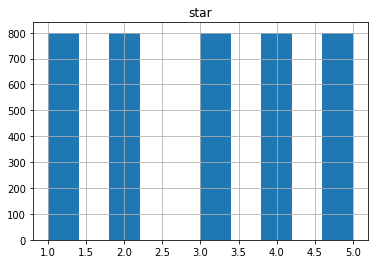

In [33]:
df = pd.DataFrame([r.star for r in revs_copy_resample])
df.columns = ["star"]
df.hist()

In [37]:
for r in revs_copy_resample:
    rev_text = r.text
    mecab_result = m.parse (rev_text)

    words_raw = [i.split() for i in mecab_result.split('\n')]

    words = []
    list_element  = ""
    
    for w in words_raw:
        if len(w)>1:
            words.append(w[0])
        
    list_element  += '__label__' +str(r.star)
    
    for w in words:
        list_element  += ' ' + w
        
    list_element  += '\n' 
        
    path = '../data/processing/train-2.lst'
    with open(path,mode='a') as f:
        f.write(list_element)
    

In [38]:
words_by_rate = [[],[],[],[],[],[]]
path = '../data/processing/train-2.lst'
words_and_rate_raw = open(path,'r')
for wa in words_and_rate_raw:
    star = int(wa.split()[0][9])
    words_by_rate[star].extend(wa.split()[1:])

In [39]:
# print(words_by_rate[1][:100])
c = collections.Counter(words_by_rate[2])
print(c.most_common())


[('。', 3288), ('の', 3184), ('が', 3060), ('、', 2748), ('て', 2407), ('に', 2368), ('た', 2307), ('は', 2065), ('で', 1543), ('と', 1453), ('し', 1440), ('を', 1388), ('です', 1018), ('ます', 912), ('も', 892), ('ない', 784), ('まし', 708), ('な', 697), ('か', 554), ('ので', 533), ('い', 519), ('ん', 496), ('ませ', 422), ('いる', 327), ('さ', 322), ('する', 308), ('から', 287), ('購入', 266), ('思い', 262), ('よう', 260), ('・', 260), ('れ', 248), ('方', 239), ('でし', 230), ('こと', 227), ('あり', 217), ('「', 215), ('」', 212), ('ある', 207), ('だ', 205), ('う', 203), ('この', 197), ('なり', 186), ('ば', 180), ('なっ', 179), ('？', 176), ('なく', 174), ('や', 150), ('もの', 150), ('まで', 149), ('感じ', 148), ('という', 145), ('使用', 143), ('なら', 135), ('…', 135), ('1', 134), ('たら', 133), ('いい', 131), ('でき', 123), ('使っ', 121), ('良い', 121), ('他', 120), ('商品', 119), ('人', 118), ('ず', 117), ('として', 116), ('なる', 115), ('本', 115), ('これ', 114), ('だけ', 113), ('なかっ', 112), ('2', 107), ('時間', 106), ('たり', 106), ('かも', 102), ('など', 100), ('しまい', 99), ('！', 98), ('的', 

In [40]:
pd.DataFrame(words_by_rate)

,0,1,2,3,4,5,6,7,8,9,...,78036,78037,78038,78039,78040,78041,78042,78043,78044,78045
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,YouTube,で,スマホ,と,リンク,しよ,う,と,する,と,...,回,に,し,なく,て,は,と,思い,ます,。
2,5,〜,10,分,て,反映,と,書い,て,い,...,None,None,None,None,None,None,None,None,None,None
3,日本,の,年間,気温,が,上昇,し,て,いる,という,...,None,None,None,None,None,None,None,None,None,None
4,効果,は,よく,わかり,ませ,ん,が,、,プラシーボ,効果,...,None,None,None,None,None,None,None,None,None,None
5,ベスパ,Ｓ,125,に,使用,25000,ｋｍ,あたり,から,ジャダー,...,None,None,None,None,None,None,None,None,None,None
